In [1]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format ='{:.1f}'.format

In [3]:
folder=r'D:\Подработки\МЭС\ver_2021_08_22'

In [4]:
Data=[]
Paths=[]

In [5]:
for filename in os.listdir(folder):
    filepath=os.path.join(folder, filename)
    if os.path.splitext(filepath)[1]=='.shp':
        df=gpd.read_file(filepath)
        Data.append(df)
        Paths.append(filepath)
    else:
        pass

In [6]:
Data1=[]

In [7]:
for df in Data:
    df=df[['Voltage', 'Name', 'Start', 'End', 'Dissolutio', 'Shape_Leng','Segment_Ty', 'geometry']]
    df.columns=['voltage','name','start', 'end', 'dissolution','length','segment type','geometry']
    Data1.append(df)

In [8]:
Data=Data1

In [9]:
for i in range(len(Data1)):
    Data1[i]=Data1[i].fillna('existing')
    i=i+1

In [10]:
result_table=[]

In [11]:
for i in range(0,len(Data),1):
    pivot=Data[i].pivot_table(index='segment type', values='length',aggfunc=['count','sum']).reset_index()
    pivot.columns=['segment_type','count','length']
    pivot['year']=os.path.basename(Paths[i]).split('.')[0].split('_')[2]
    result_table.append(pivot)
    i=i+1

In [12]:
table=pd.concat(result_table)

In [13]:
table.head()

,segment_type,count,length,year
0,New line construction,1,236131.3,1936
0,existing,1,236131.3,1937
0,New line construction,2,236694.1,1938
1,existing,1,236131.3,1938
0,existing,3,472825.4,1939


In [14]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 0
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   segment_type  395 non-null    object 
 1   count         395 non-null    int64  
 2   length        395 non-null    float64
 3   year          395 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 15.4+ KB


In [15]:
count_table=table.pivot_table(index='year', columns='segment_type', values='count').reset_index().fillna(0)

In [16]:
count_table.columns=count_table.columns.str.lower()

In [17]:
for col in count_table.columns:
    count_table[col]=count_table[col].astype(int)

In [18]:
count_table.head()

segment_type,year,branch construction,branch dismantling,cut construction,cut dismantling,line dismantling,new line construction,re-routing construction,re-routing dismantling,existing
0,1936,0,0,0,0,0,1,0,0,0
1,1937,0,0,0,0,0,0,0,0,1
2,1938,0,0,0,0,0,2,0,0,1
3,1939,0,0,0,0,0,0,0,0,3
4,1940,0,0,2,1,0,3,0,0,4


In [19]:
length_table=table.pivot_table(index='year', columns='segment_type', values='length').reset_index().fillna(0)

In [20]:
length_table.columns=length_table.columns.str.lower()

In [21]:
length_table['total']=length_table[['branch construction', 'cut construction','new line construction','re-routing construction', 'existing']].sum(axis=1) - length_table[[ 'branch dismantling','cut dismantling', 'line dismantling', 're-routing dismantling']].sum(axis=1)

In [22]:
length_table=length_table[['year','new line construction', 'branch construction', 'cut construction','re-routing construction',
               'existing','line dismantling', 'branch dismantling','cut dismantling', 're-routing dismantling', 'total']]

In [23]:
length_table['year']=length_table['year'].astype(int)

In [24]:
length_table=length_table.query('year!=2021')

In [25]:
length_table=length_table.set_index('year')

In [26]:
data=length_table.sort_values(by='year', ascending=False)

In [27]:
colors_dict={'existing': '#E8E8E8', 'new line construction': '#016c59', 'cut construction':'#67a9cf',
            'branch construction':'#1c9099','re-routing construction':'#a6bddb','line dismantling':'#c994c7',
            'cut dismantling':'#dd1c77','branch dismantling':'#df65b0','re-routing dismantling':'#980043', 'total': '#E8E8E8'}

C:\Users\missn\AppData\Local\Temp/ipykernel_872/3971732373.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '100', '200', '300', '400', '500', '600'])
C:\Users\missn\AppData\Local\Temp/ipykernel_872/3971732373.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['0','5k', '10k', '15k'])


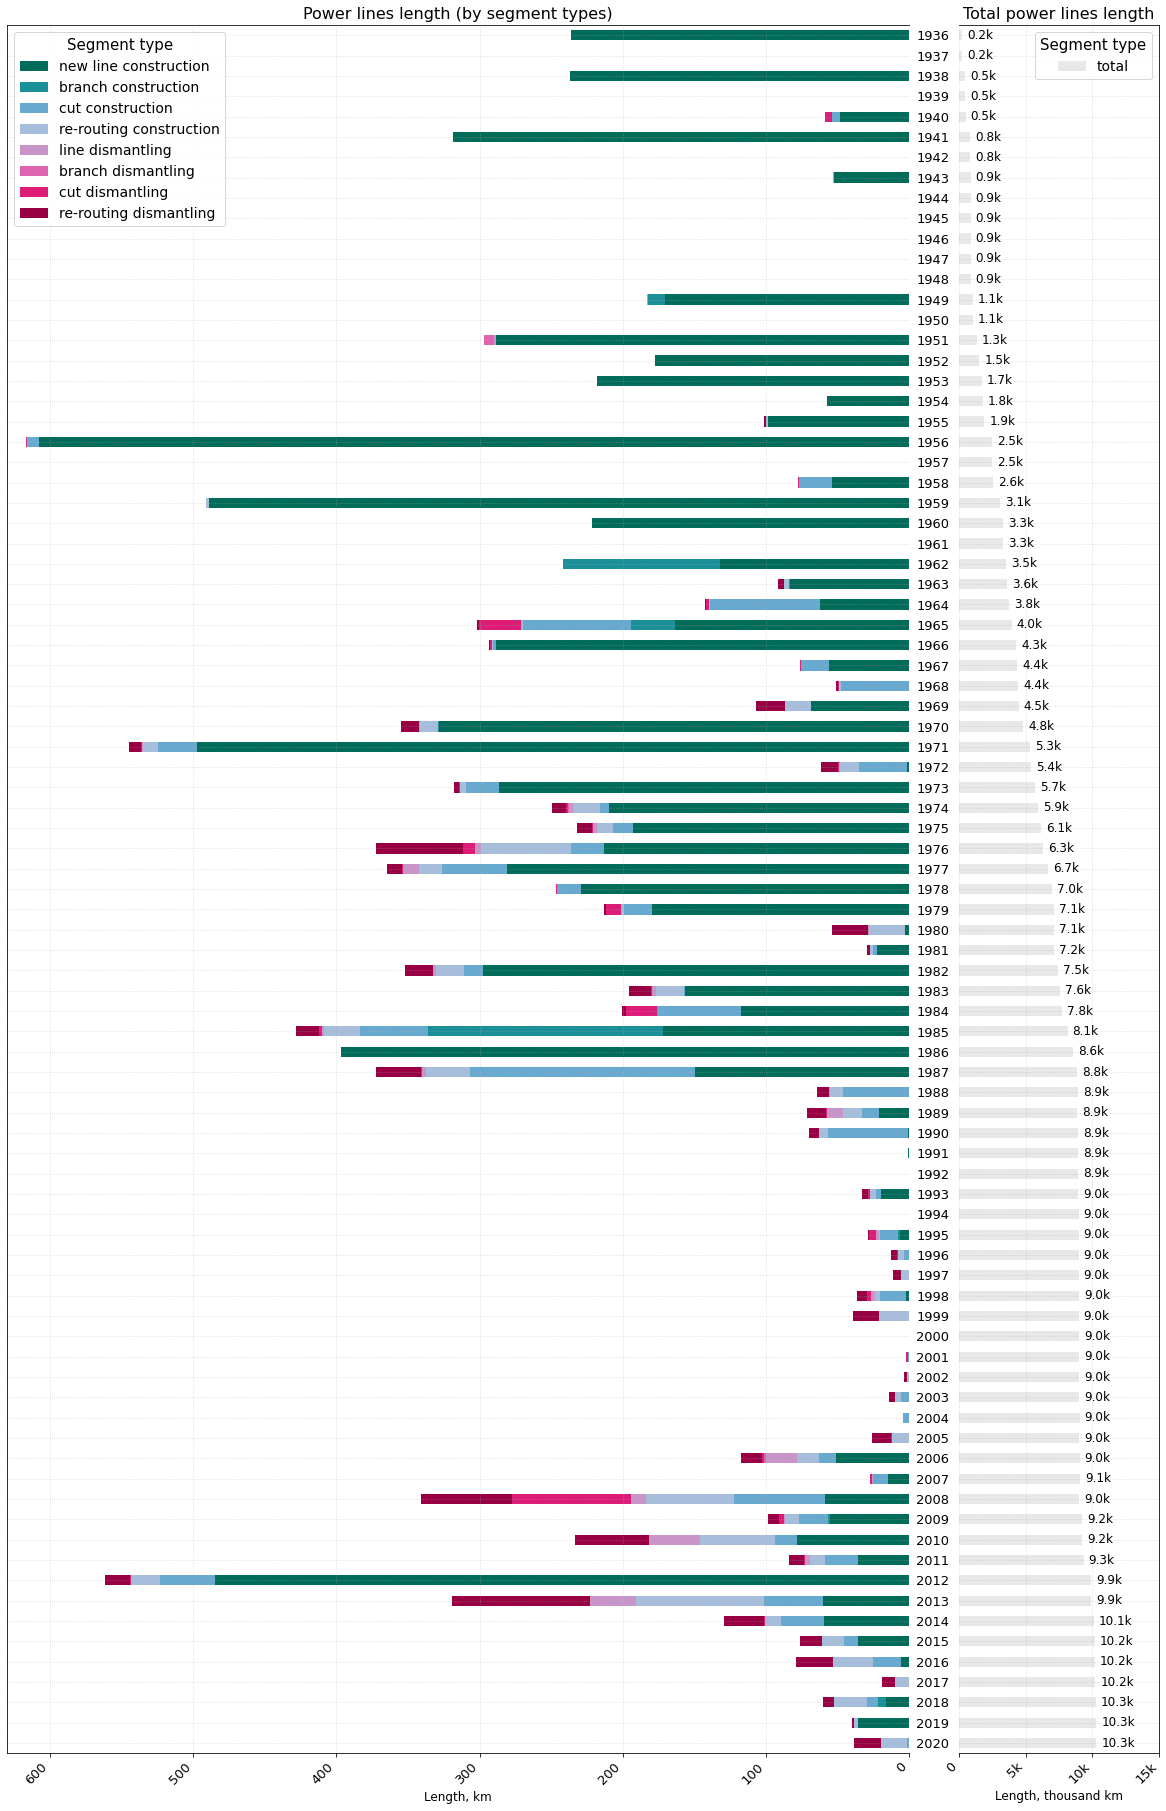

In [28]:
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [4.5, 1]})
ax.set_title('Power lines length (by segment types)', fontsize=16)
ax2.set_title('Total power lines length',fontsize=16)
f.set_facecolor('white')
ax.set_facecolor('white')
ax2.set_facecolor('white')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.09, 
                    hspace=0.4)
data.drop(['total','existing'], axis=1).plot.barh(figsize=(20,30),stacked=True, color=colors_dict,ax=ax)
data[['total']].plot.barh(figsize=(20,30),stacked=True, color=colors_dict,ax=ax2)
ax.set_xlim(0, 630000)  # outliers only
ax2.set_xlim(0, 15000000)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.set_xlabel('Length, km', fontsize='large')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xticklabels(['0', '100', '200', '300', '400', '500', '600'])
ax2.set_xticklabels(['0','5k', '10k', '15k'])
ax.grid(linestyle= "dotted", alpha=0.5)
ax2.grid(linestyle= "dotted", alpha=0.5)
ax2.set_xlabel('Length, thousand km', fontsize='large')
ax2.set_ylabel('')
ax.set_ylabel('')
ax.tick_params(right=False)
ax2.tick_params(left=False)
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
for label in ax2.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
ax.invert_xaxis()
rects = ax2.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'
    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'
    # Use X value as label and format number with one decimal place
    label = str(round((x_value/1000000),1)) + 'k'
    # Create annotation
    ax2.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,
        size=12)    
ax.legend(ncol=1, loc="upper left", frameon=True, fontsize = 14, title='Segment type', title_fontsize=15)
ax2.legend(ncol=1, loc="upper right", frameon=True, fontsize = 14, title='Segment type', title_fontsize=15)
ax.tick_params(axis = 'both',labelsize=13)
ax2.tick_params(axis = 'both',labelsize=13)
##d = .007
##kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
##ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)        
##ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  
##kwargs.update(transform=ax2.transAxes)  
##ax2.plot((-d, +d), (-d, +d), **kwargs)  
##ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs) 
##f.text(0.5, 0.04, 'Length, km', ha='center')

In [29]:
years=length_table.index.astype(int).tolist()

In [30]:
split = np.array_split(years, 17)
for array in split:
    print(list(array))

[1936, 1937, 1938, 1939, 1940]
[1941, 1942, 1943, 1944, 1945]
[1946, 1947, 1948, 1949, 1950]
[1951, 1952, 1953, 1954, 1955]
[1956, 1957, 1958, 1959, 1960]
[1961, 1962, 1963, 1964, 1965]
[1966, 1967, 1968, 1969, 1970]
[1971, 1972, 1973, 1974, 1975]
[1976, 1977, 1978, 1979, 1980]
[1981, 1982, 1983, 1984, 1985]
[1986, 1987, 1988, 1989, 1990]
[1991, 1992, 1993, 1994, 1995]
[1996, 1997, 1998, 1999, 2000]
[2001, 2002, 2003, 2004, 2005]
[2006, 2007, 2008, 2009, 2010]
[2011, 2012, 2013, 2014, 2015]
[2016, 2017, 2018, 2019, 2020]


In [31]:
def period(year):
    for period1 in split:
        if int(year) in period1:
            return (str(period1[0])+'-'+str(period1[4]))

In [32]:
data['year_1']=data.index

In [33]:
data['period']=data.apply(lambda x:period(x.year_1), axis=1)

In [34]:
data=data.drop(['year_1'], axis=1)

In [35]:
periods=data.pivot_table(index='period').sort_values(by='period', ascending=False)

In [36]:
periods=periods[['new line construction', 'branch construction', 'cut construction','re-routing construction',
               'existing','line dismantling', 'branch dismantling','cut dismantling', 're-routing dismantling', 'total']]

C:\Users\missn\AppData\Local\Temp/ipykernel_872/431635090.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '50', '100', '150', '200', '250', '300'])
C:\Users\missn\AppData\Local\Temp/ipykernel_872/431635090.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['0','5k', '10k', '15k'])


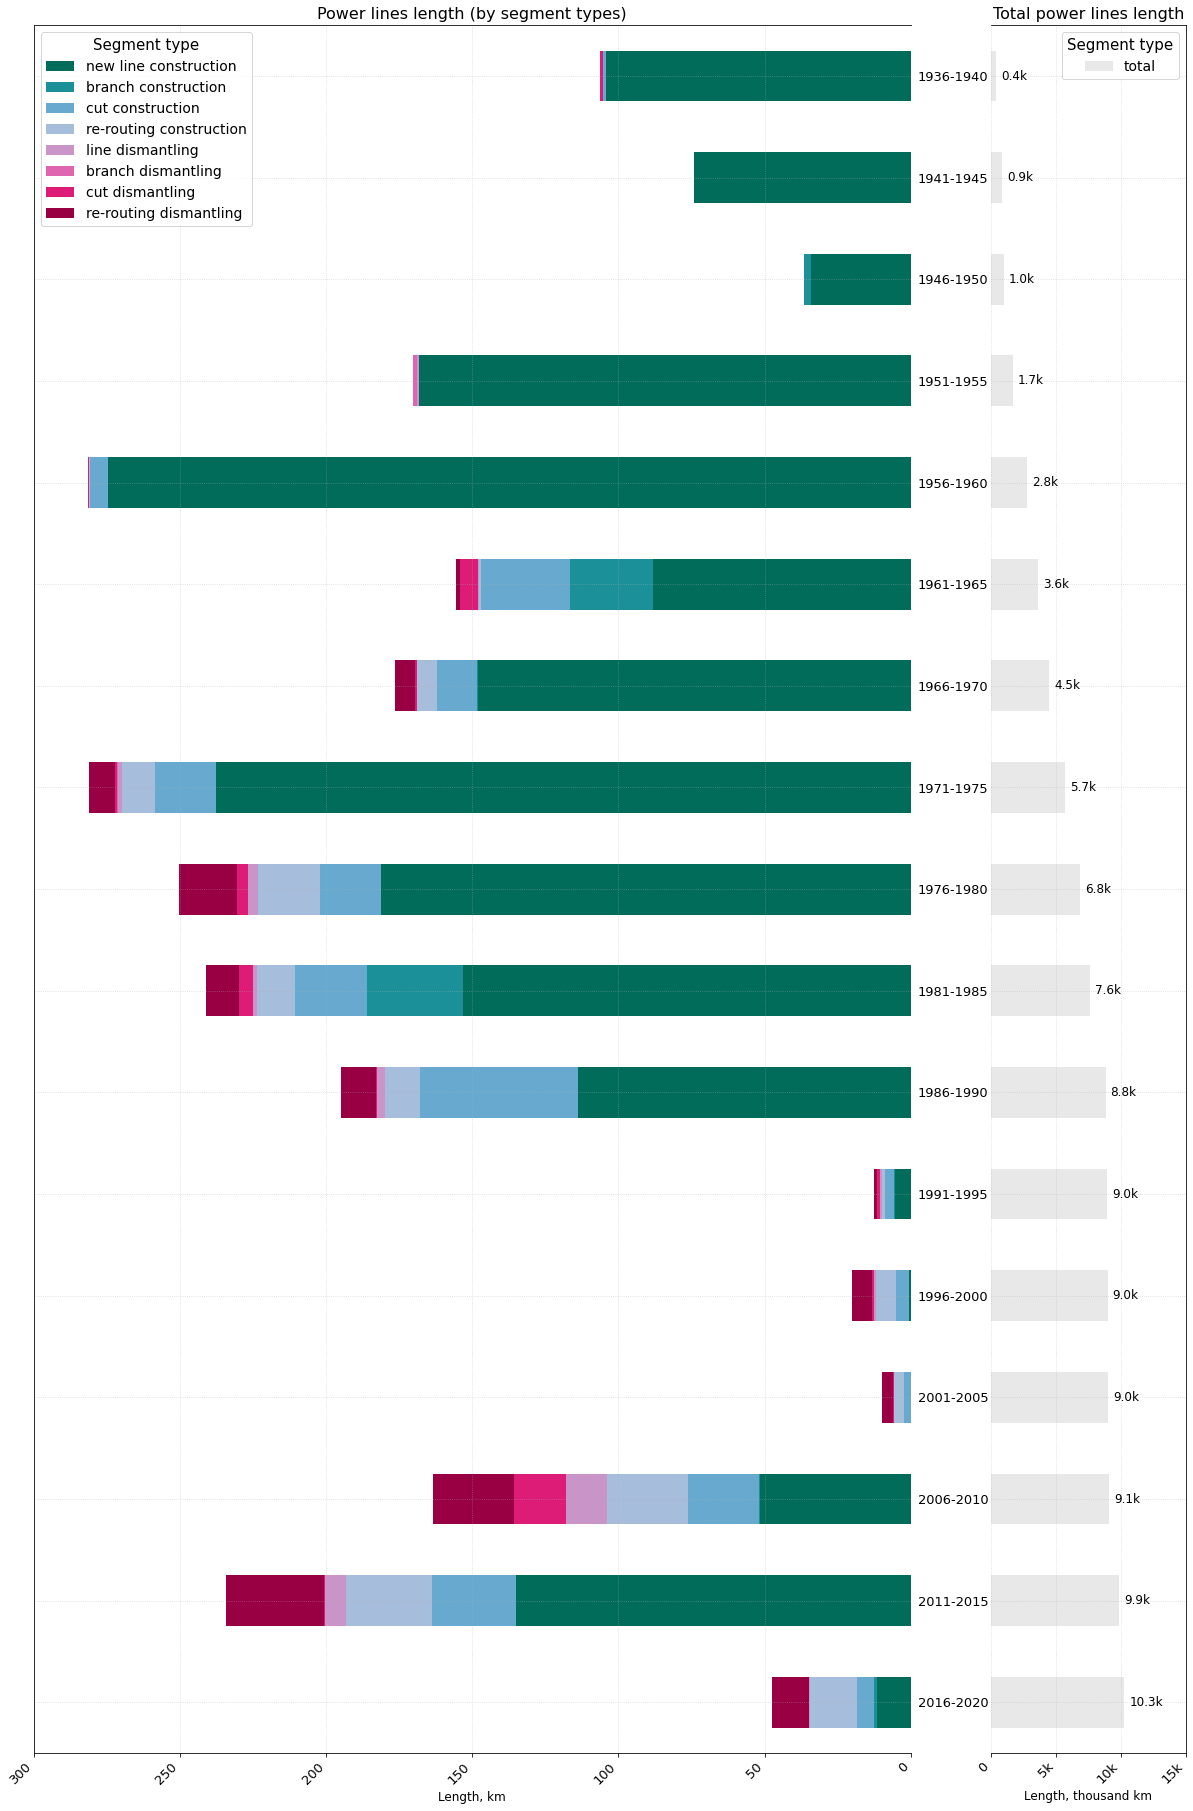

In [37]:
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [4.5, 1]})
ax.set_title('Power lines length (by segment types)', fontsize=16)
ax2.set_title('Total power lines length',fontsize=16)
f.set_facecolor('white')
ax.set_facecolor('white')
ax2.set_facecolor('white')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.15, 
                    hspace=0.4)
periods.drop(['total','existing'], axis=1).plot.barh(figsize=(20,30),stacked=True, color=colors_dict,ax=ax)
periods[['total']].plot.barh(figsize=(20,30),stacked=True, color=colors_dict,ax=ax2)
ax.set_xlim(0, 300000)  # outliers only
ax2.set_xlim(0, 15000000)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.set_xlabel('Length, km', fontsize='large')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xticklabels(['0', '50', '100', '150', '200', '250', '300'])
ax2.set_xticklabels(['0','5k', '10k', '15k'])
ax.grid(linestyle= "dotted", alpha=0.5)
ax2.grid(linestyle= "dotted", alpha=0.5)
ax2.set_xlabel('Length, thousand km', fontsize='large')
ax2.set_ylabel('')
ax.set_ylabel('')
ax.tick_params(right=False)
ax2.tick_params(left=False)
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
for label in ax2.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
ax.invert_xaxis()
rects = ax2.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'
    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'
    # Use X value as label and format number with one decimal place
    label = str(round((x_value/1000000),1)) + 'k'
    # Create annotation
    ax2.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,
        size=12)    
ax.legend(ncol=1, loc="upper left", frameon=True, fontsize = 14, title='Segment type', title_fontsize=15)
ax2.legend(ncol=1, loc="upper right", frameon=True, fontsize = 14, title='Segment type', title_fontsize=15)
ax.tick_params(axis = 'both',labelsize=13)
ax2.tick_params(axis = 'both',labelsize=13)

In [38]:
count_table=count_table.set_index('year')

In [39]:
count_table=count_table.drop(2021)

In [40]:
years=count_table.index.astype(int).tolist()

In [41]:
count_table['year_1']=count_table.index

In [42]:
count_table['period']=count_table.apply(lambda x:period(x.year_1), axis=1)

In [43]:
count_table=count_table.drop(['year_1'], axis=1)

In [44]:
periods=count_table.pivot_table(index='period', aggfunc='sum').sort_values(by='period', ascending=True)

In [45]:
periods.head()

segment_type,branch construction,branch dismantling,cut construction,cut dismantling,existing,line dismantling,new line construction,re-routing construction,re-routing dismantling
period,,,,,,,,,
1936-1940,0,0,2,1,9,0,6,0,0
1941-1945,0,0,0,0,58,2,7,0,0
1946-1950,1,0,0,0,74,2,5,0,0
1951-1955,0,1,0,0,118,6,18,2,2
1956-1960,0,0,10,5,180,5,23,1,1


In [46]:
table1=table.query('segment_type=="New line construction" or segment_type=="Cut dismantling"')

In [47]:
table1['period']=table1.apply(lambda x:period(x.year), axis=1)

C:\Users\missn\AppData\Local\Temp/ipykernel_872/3651165629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table1['period']=table1.apply(lambda x:period(x.year), axis=1)


In [48]:
table3=table1.pivot_table(index='segment_type', values='count', aggfunc='sum', columns='period').fillna(0).reset_index()

In [49]:
table3.head()

period,segment_type,1936-1940,1941-1945,1946-1950,1951-1955,1956-1960,1961-1965,1966-1970,1971-1975,1976-1980,1981-1985,1986-1990,1991-1995,1996-2000,2001-2005,2006-2010,2011-2015,2016-2020
0,Cut dismantling,1.0,0.0,0.0,0.0,5.0,6.0,8.0,12.0,13.0,13.0,10.0,6.0,4.0,6.0,34.0,15.0,7.0
1,New line construction,6.0,7.0,5.0,18.0,23.0,25.0,20.0,39.0,31.0,37.0,21.0,4.0,2.0,0.0,44.0,45.0,13.0


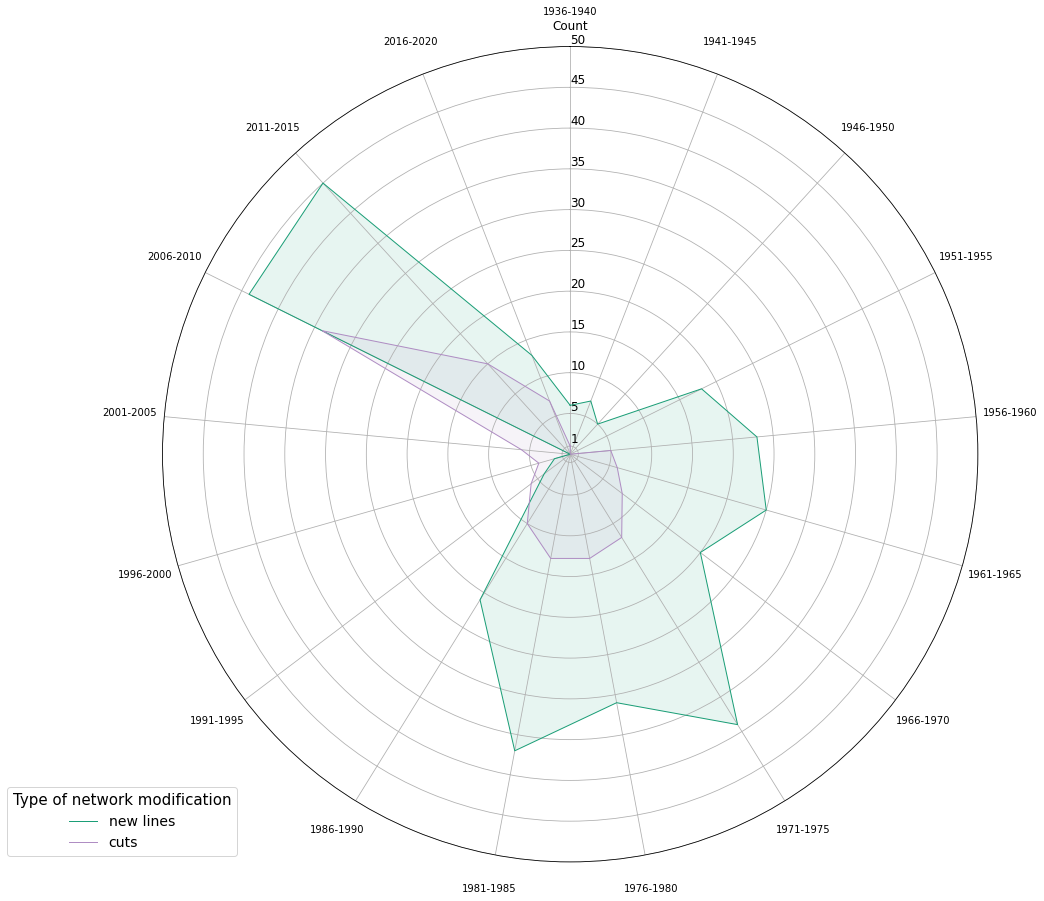

In [50]:
fig = plt.figure(figsize=(15,15))
# ------- PART 1: Create background
from math import pi
# number of variable
categories=list(table3)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, fontsize=12, color="black")
labels = []

 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,5,10,15,20,25,30,35,40,45,50], ["1","5","10","15","20","25","30","35","40","45","50"], 
           color="black", fontsize=12)
plt.ylim(0,50)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=table3.loc[1].drop(['segment_type']).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="new lines", color="#1b9e77")
ax.fill(angles, values, '#1b9e77', alpha=0.1)
 
# Ind2
values=table3.loc[0].drop(['segment_type']).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="cuts", color="#af8dc3")
ax.fill(angles, values, '#af8dc3', alpha=0.1)



# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1),fontsize = 14, title='Type of network modification', title_fontsize=15)
labels = []
for label, angle in zip(ax.get_xticklabels(), angles):
    x,y = label.get_position()
    lab = ax.text(x,y-.05, label.get_text(), transform=label.get_transform(), ha=label.get_ha(), va=label.get_va())
    labels.append(lab)
ax.set_xticklabels([])
ax.set_title('Сount', fontsize=12, pad=17)
# Show the graph
plt.show()